Payam Taebi
400104867
[github](https://github.com/aqaPayam)

In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
df = pd.read_csv("heart.csv")

df['target'] = np.where(df['target'] == 0, -1, df['target'])

if set(df['target'].unique()) == {-1, 1}:
    print("All target values are either 1 or -1.")
else:
    print("Target values contain values other than 1 or -1.")

    
    
print(df.head())

print(df.dtypes)

All target values are either 1 or -1.
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3      -1  
1   0     3      -1  
2   0     3      -1  
3   1     3      -1  
4   3     2      -1  
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [3]:
print(df.head())
print("Shape of the dataset:", df.shape)
print()

print("Missing values:")
print(df.isnull().sum())
print()

print("Summary statistics:")
print(df.describe())
print()

print("Class distribution:")
print(df['target'].value_counts())
print()

print("Correlation matrix:")
print(df.corr())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3      -1  
1   0     3      -1  
2   0     3      -1  
3   1     3      -1  
4   3     2      -1  
Shape of the dataset: (1025, 14)

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000

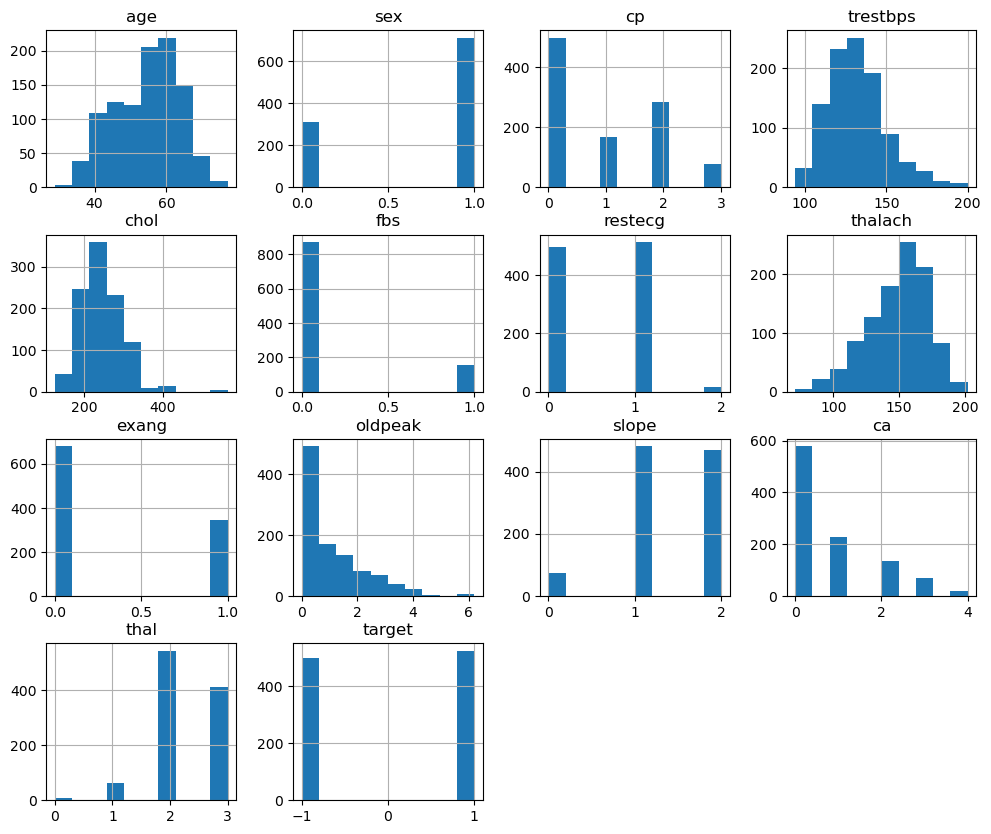

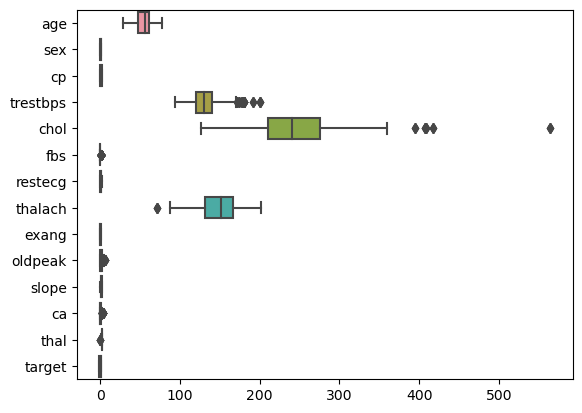

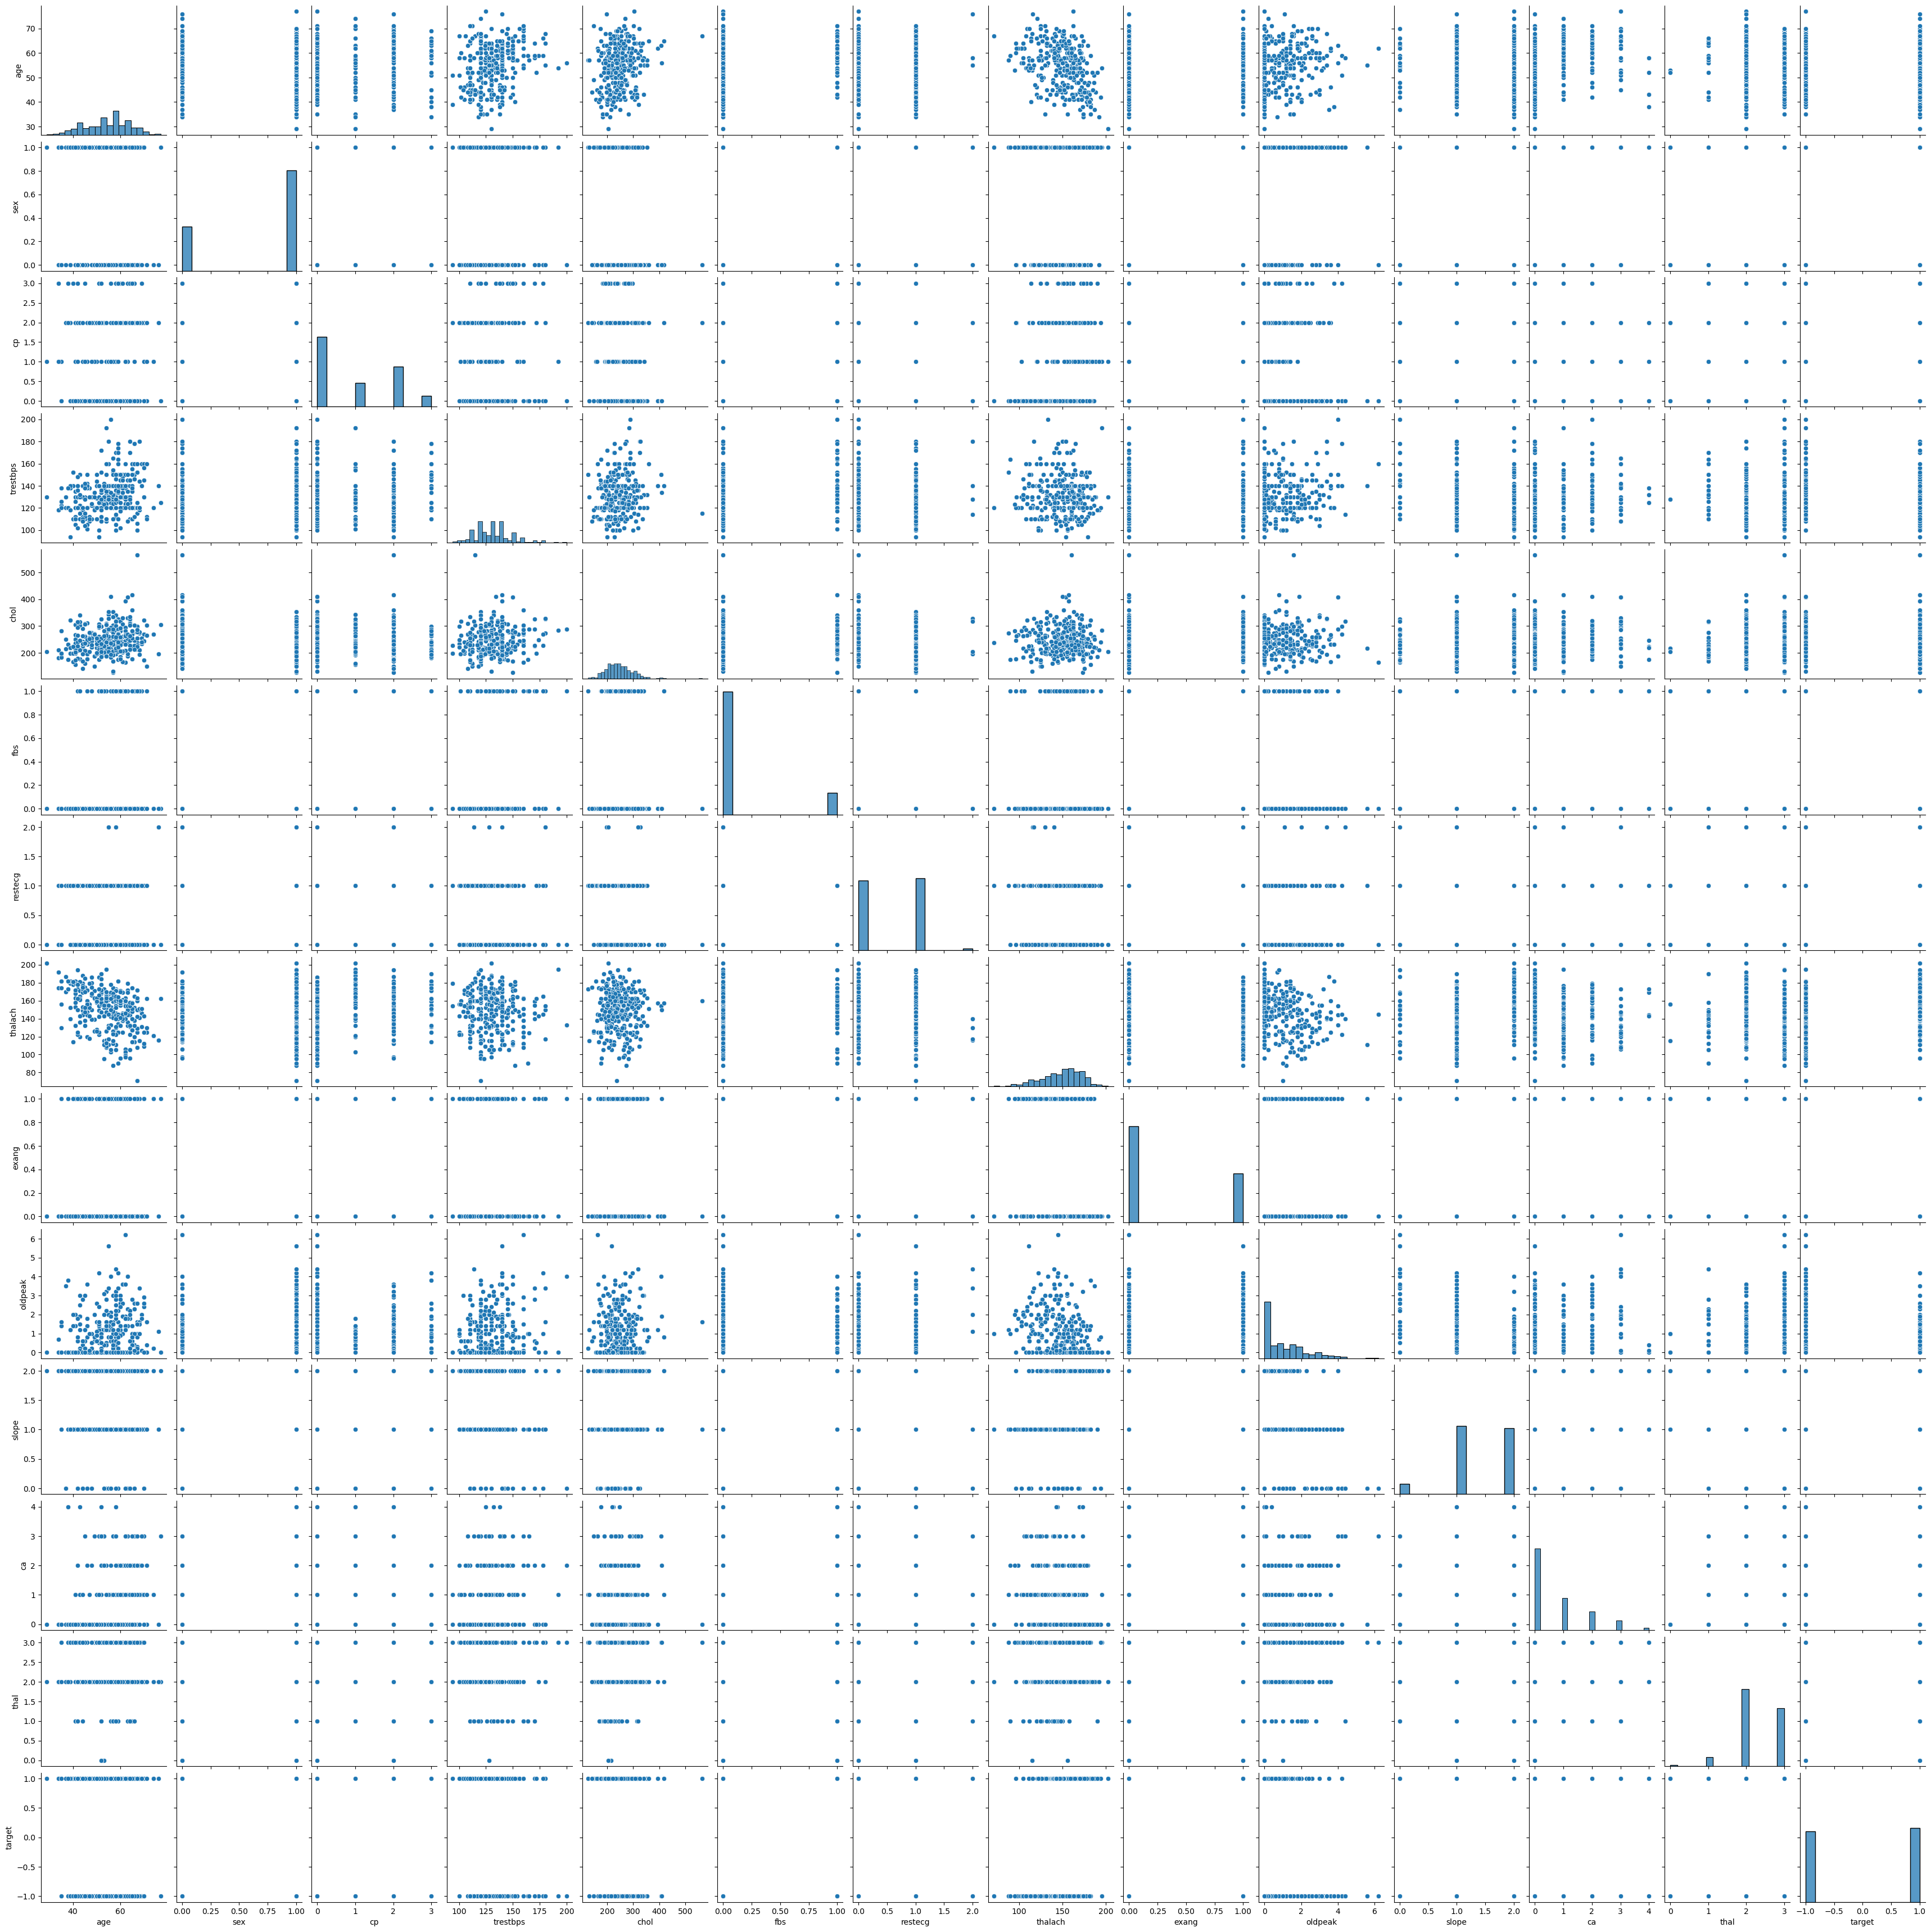

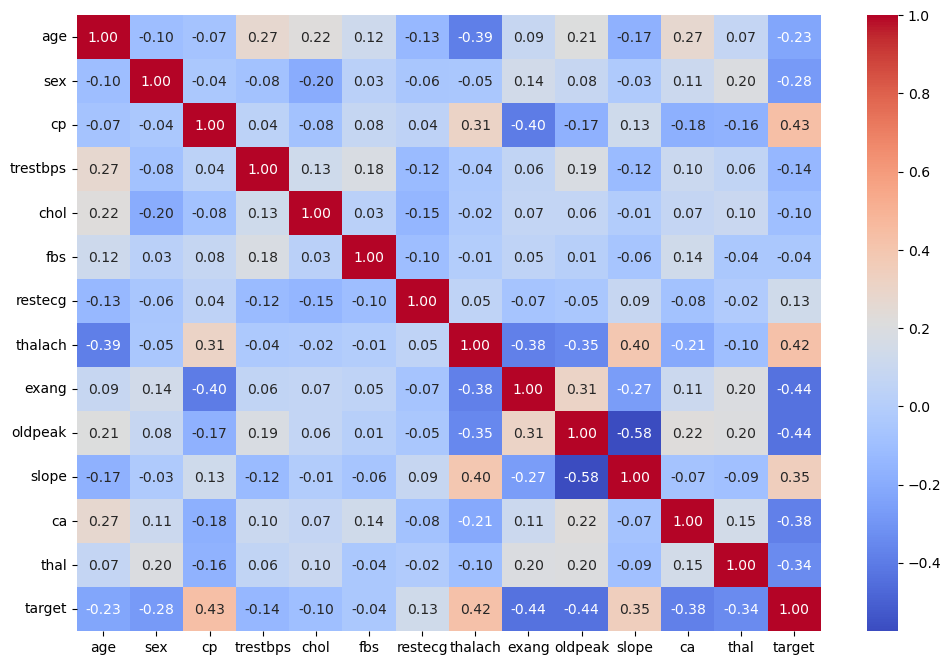

In [4]:
df.hist(figsize=(12, 10))
plt.show()

sns.boxplot(data=df, orient="h")
plt.show()

sns.pairplot(df)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


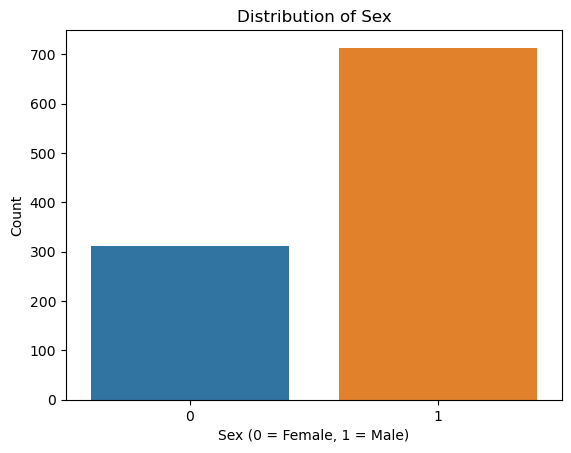

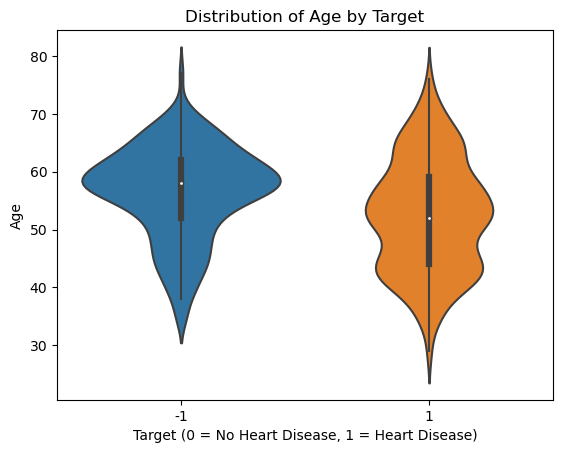

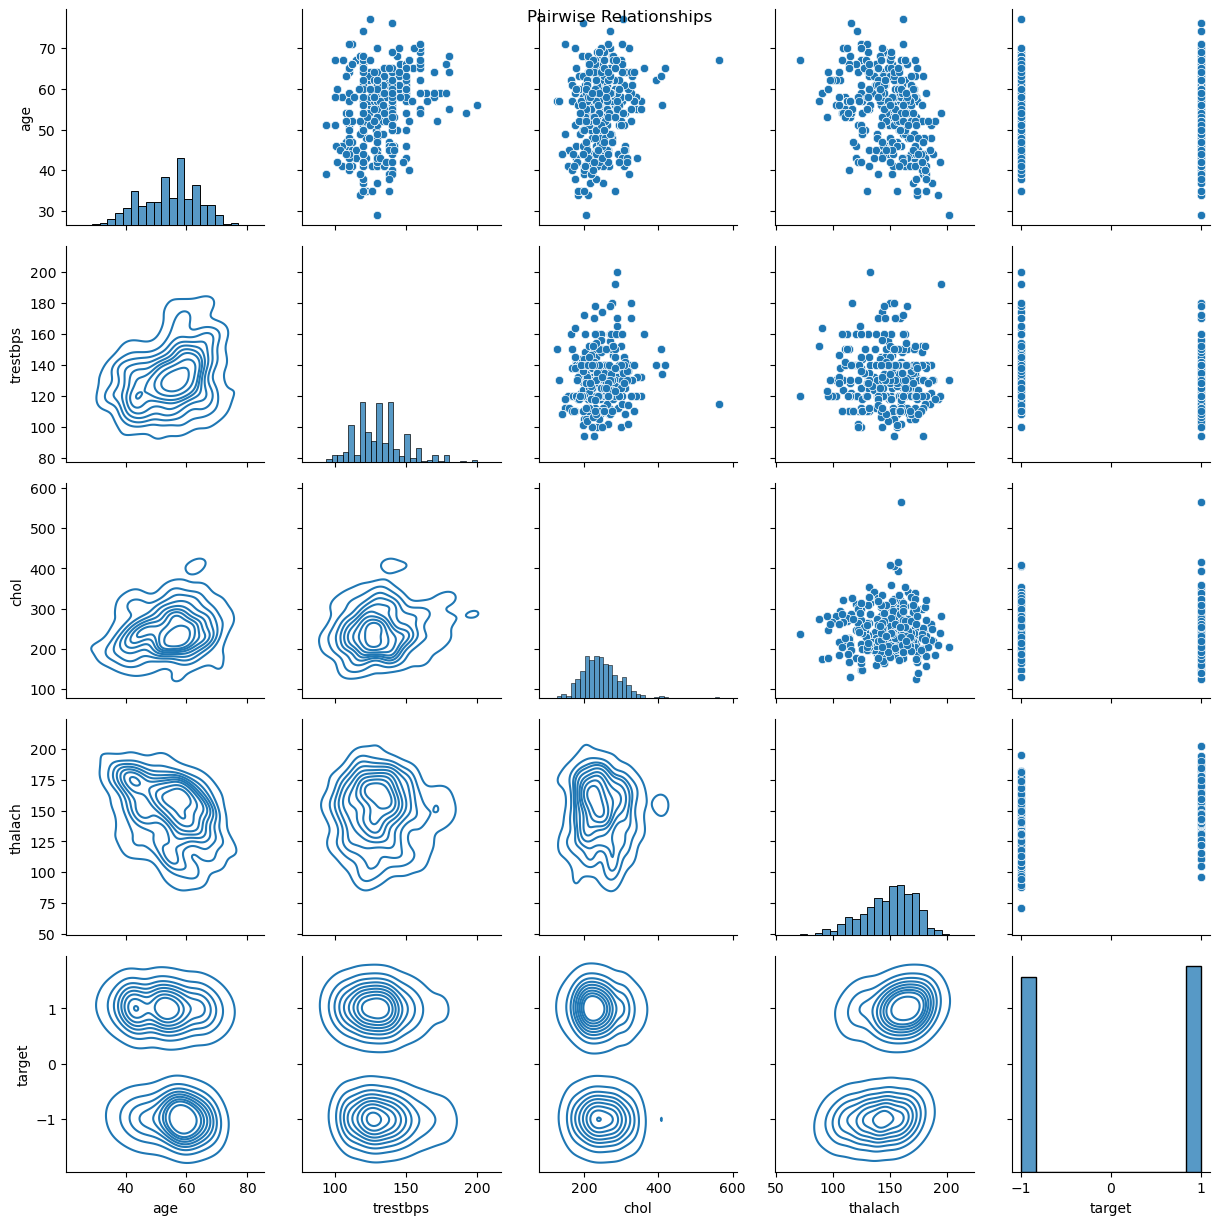

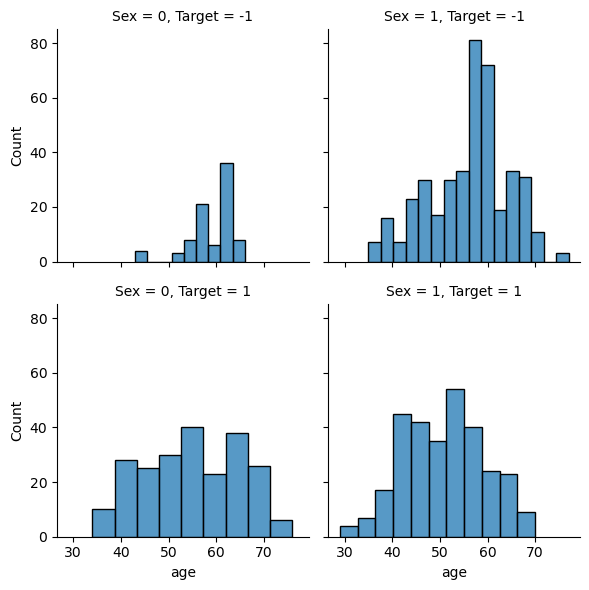

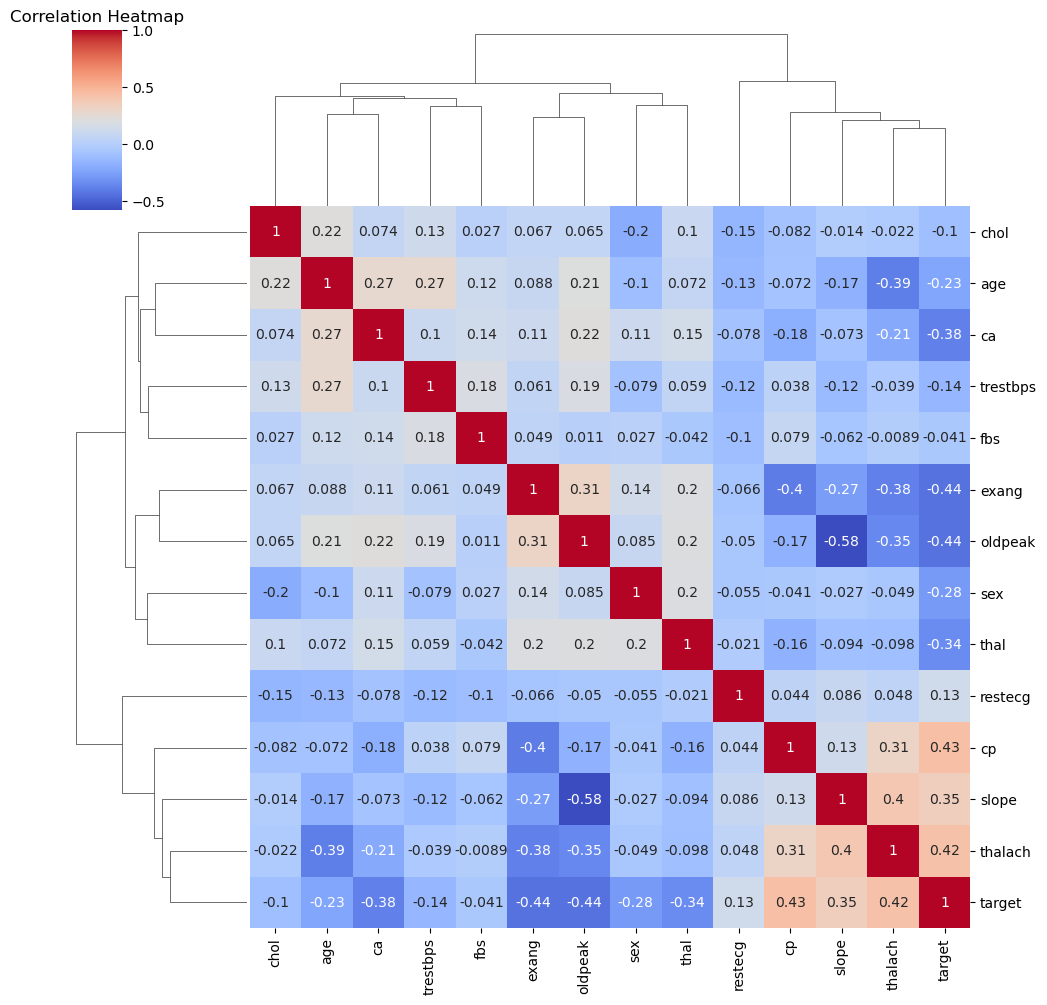

In [5]:
sns.countplot(x='sex', data=df)
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# Violin plot of 'age' across different 'target' values
sns.violinplot(x='target', y='age', data=df)
plt.title("Distribution of Age by Target")
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Age")
plt.show()

# PairGrid for a subset of columns
g = sns.PairGrid(df[['age', 'trestbps', 'chol', 'thalach', 'target']])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
plt.suptitle("Pairwise Relationships")
plt.show()

# FacetGrid for 'sex' and 'target'
g = sns.FacetGrid(df, col='sex', row='target')
g.map(sns.histplot, 'age')
g.set_titles("Sex = {col_name}, Target = {row_name}")
plt.show()

# Hierarchical clustering heatmap of correlation matrix
sns.clustermap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [6]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [7]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [8]:
def perceptron_sgd(X, Y, learning_rate=0.01, epochs=500):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate
    _____________________________________________________________________________

    Perceptron using Stochastic Gradient Descent (SGD) with hinge loss function.

    Parameters:
    X : numpy array
        Input features.
    Y : numpy array
        Corresponding labels (+1 or -1).
    learning_rate : float, optional
        Learning rate for the algorithm. Default is 0.01.
    epochs : int, optional
        Number of epochs for training. Default is 100.

    Returns:
    w : numpy array
        Learned weight vector.
    '''

    #X = np.c_[X, np.ones(len(X))]

    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        
        #shufle
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i, x in enumerate(X_shuffled):
            prediction = np.dot(X_shuffled[i], w)
            loss = max(0, 1 - Y_shuffled[i] * prediction)

            if loss > 0:
                w = w + learning_rate * Y_shuffled[i] * X_shuffled[i]

    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [9]:
def perceptron_sgd_plot(X, Y, learning_rate=0.01, epochs=500):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array

    Perceptron using Stochastic Gradient Descent (SGD) with hinge loss function.
    Trains the perceptron and plots the total loss in each epoch.
    _____________________________________________________________

    Parameters:
    X : numpy array
        Input features.
    Y : numpy array
        Corresponding labels (+1 or -1).
    learning_rate : float, optional
        Learning rate for the algorithm. Default is 0.01.
    epochs : int, optional
        Number of epochs for training. Default is 100.

    Returns:
    w : numpy array
        Learned weight vector.
    '''

    #X = np.c_[X, np.ones(len(X))]

    w = np.zeros(X.shape[1])

    total_loss_per_epoch = []

    for epoch in range(epochs):
        total_loss = 0
        indices = np.random.permutation(len(X))
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for i, x in enumerate(X_shuffled):
            prediction = np.dot(X_shuffled[i], w)
            loss = max(0, 1 - Y_shuffled[i] * prediction)
            total_loss += loss

            if loss > 0:
                w = w + learning_rate * Y_shuffled[i] * X_shuffled[i]
                
        total_loss_per_epoch.append(total_loss)

    # Plot 
    plt.plot(total_loss_per_epoch)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss, Learning rate = {}'.format(learning_rate))
    plt.title('Total Loss per Epoch')
    plt.show()

    return w

In [10]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [11]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.full((X.shape[0], 1), -1)

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [12]:
# TODO: Split the data to train and test with a 0.2 ratio
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

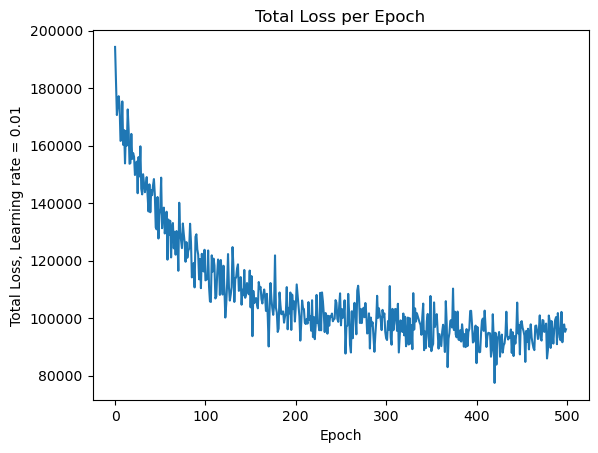

[-165.05   213.45    -7.44    33.08  -118.06    75.92  -207.61  -193.88
    2.94    -3.11    -3.01     8.34  -199.755    2.7  ]


In [13]:
w = perceptron_sgd_plot(X_train,y_train)
print(w)

In [14]:
def predict(X, w):
    '''
    Predict labels for input features using the learned weights.

    Parameters:
    X : numpy array
        Input features.
    w : numpy array
        Learned weight vector.

    Returns:
    predictions : numpy array
        Predicted labels (+1 or -1).
    '''
    
    raw_scores = np.dot(X, w)
    #print(X.shape)
    #print(w.shape)
    
    predictions = np.sign(raw_scores)

    return predictions.astype(int)


In [15]:
predict(X_val,w)

array([ 1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1])

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [16]:
def accuracy_score(y_true, y_pred):
    '''
    Calculate the accuracy of the model by comparing the predicted labels
    with the true labels.

    Parameters:
    y_true : numpy array
        True labels.
    y_pred : numpy array
        Predicted labels.

    Returns:
    accuracy : float
        Accuracy of the model.
    '''
    
    correct_predictions = np.sum(y_true == y_pred)
    #print(correct_predictions)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples

    return accuracy

Get the accuracy of your model using the function you implemented.

In [17]:
predictions = predict(X_val,w)
#print(predictions)

# Print the accuracy
print(accuracy_score(y_val, predictions))

0.7268292682926829


### Hyper Parameters setting

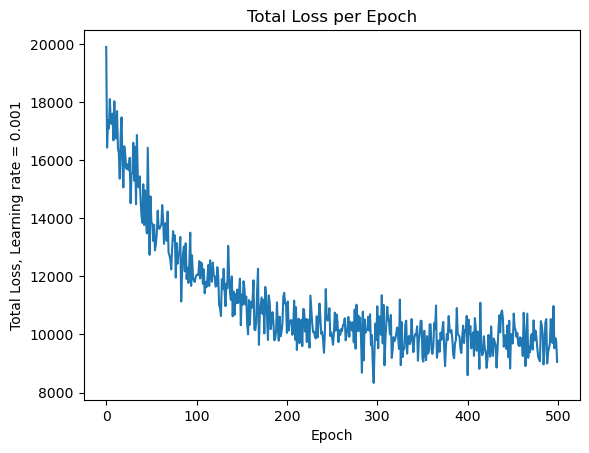

Learning rate: 0.001
Accuracy = 0.6683


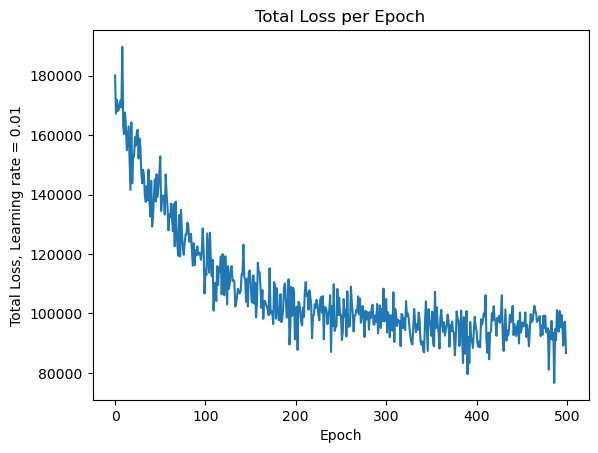

Learning rate: 0.01
Accuracy = 0.7220


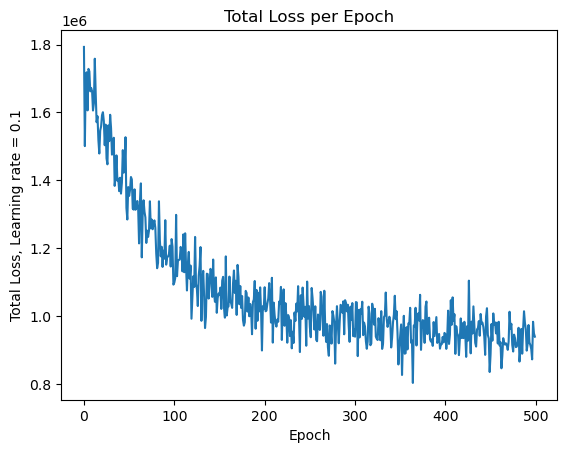

Learning rate: 0.1
Accuracy = 0.7171


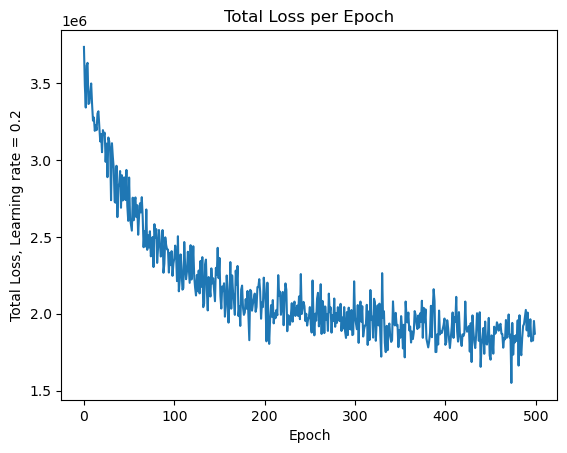

Learning rate: 0.2
Accuracy = 0.6976


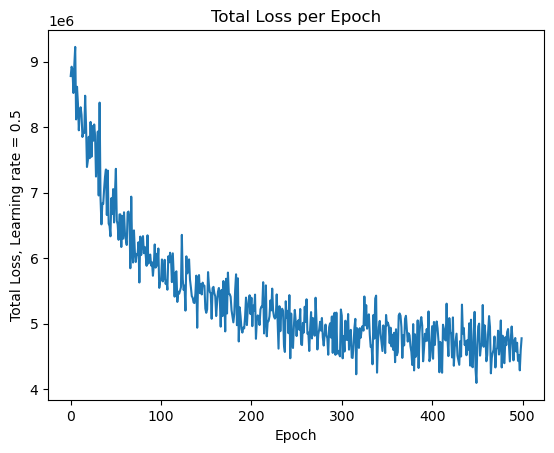

Learning rate: 0.5
Accuracy = 0.6195


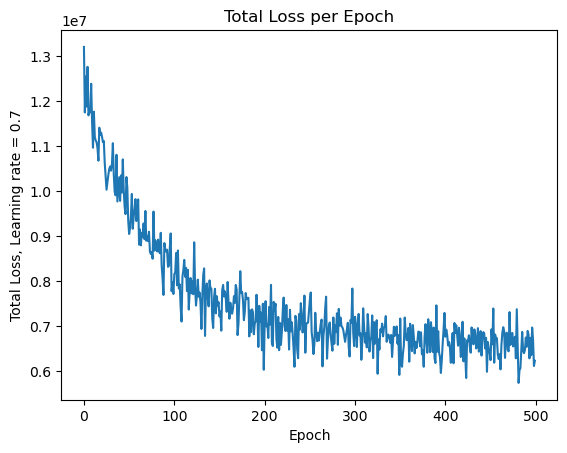

Learning rate: 0.7
Accuracy = 0.7756


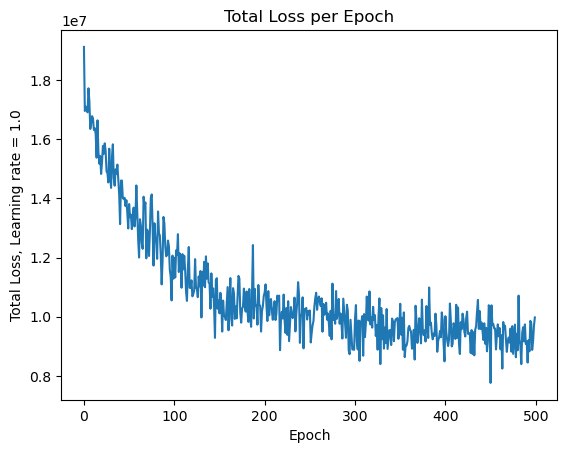

Learning rate: 1.0
Accuracy = 0.7122


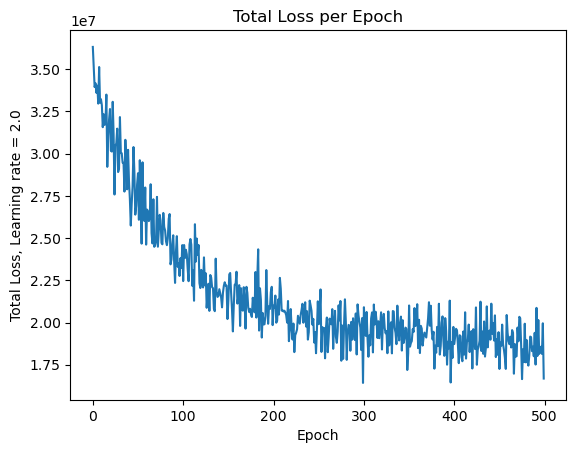

Learning rate: 2.0
Accuracy = 0.7122


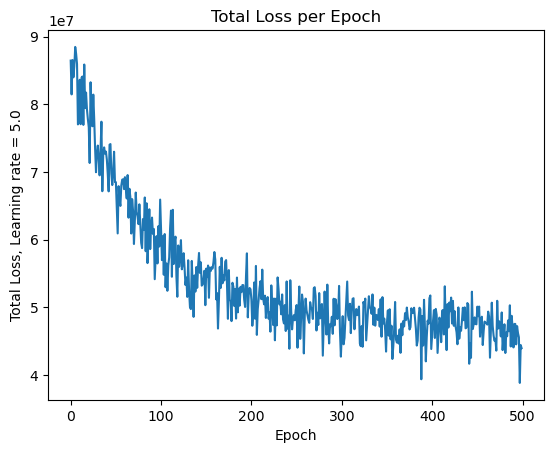

Learning rate: 5.0
Accuracy = 0.6244
Best learning rate: 0.7
Best accuracy on validation set: 0.775609756097561


In [18]:
learning_rates = [0.001, 0.01, 0.1,0.2,0.5,0.7, 1.0,2.0,5.0]

best_accuracy = 0
best_learning_rate = None
best_w = None
for lr in learning_rates:
    
    w = perceptron_sgd_plot(X_train, y_train, learning_rate=lr)
    
    # Make predictions on the validation set
    
    Y_val_pred = predict(X_val,w)

    accuracy = accuracy_score(y_val, Y_val_pred)
    
    print("Learning rate:", lr)
    print("Accuracy = {:.4f}".format(accuracy))
    
    # Check if this learning rate gives better accuracy
    if accuracy > best_accuracy:
        best_w = w
        best_accuracy = accuracy
        best_learning_rate = lr

print("Best learning rate:", best_learning_rate)
print("Best accuracy on validation set:", best_accuracy)

In [19]:
w = best_w
predictions = predict(X_val,w)
#print(predictions)

# Print the accuracy
print(accuracy_score(y_val, predictions))

0.775609756097561


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [20]:
def confusion_matrix(actual, predicted, labels):
    '''
    Generate the confusion matrix by receiving the predicted labels,
    the real labels, and the labels themselves.

    Parameters:
    actual : numpy array
        True labels.
    predicted : numpy array
        Predicted labels.
    labels : list
        List of label names.

    Returns:
    matrix : numpy array
        Confusion matrix.
    '''
    # Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # Populate the confusion matrix
    for a, p in zip(actual, predicted):
        #print(a,p)
        matrix[labels.index(a), labels.index(p)] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [21]:
def plot_confusion_matrix(matrix, labels):
    '''
    Plot the confusion matrix.

    Parameters:
    matrix : numpy array
        Confusion matrix.
    labels : list
        List of label names.
    '''
    # Create a heatmap of the confusion matrix
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Now plot the confusion matrix for your model:

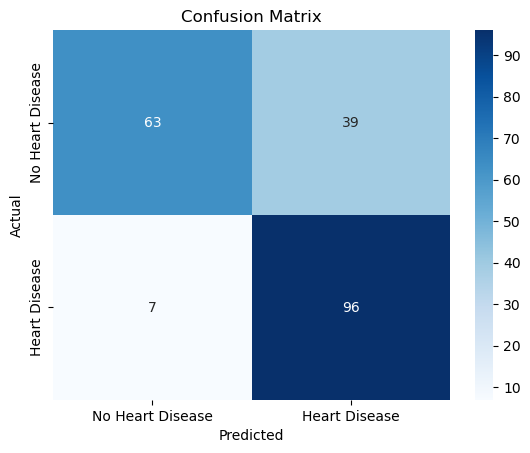

In [22]:
cm = confusion_matrix(y_val, predictions, labels=[-1, 1])

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['No Heart Disease', 'Heart Disease'])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [23]:
def recall_score(cm):
    '''
    Calculate the recall score using the confusion matrix.

    Parameters:
    cm : numpy array
        Confusion matrix.

    Returns:
    recall : float
        Recall score.
    '''
    TP = cm[1, 1]
    FN = cm[1, 0]

    recall = TP / (TP + FN)
    return recall

print(recall_score(cm))

0.9320388349514563


In [24]:
def precision_score(cm):
    '''
    Calculate the precision score using the confusion matrix.

    Parameters:
    cm : numpy array
        Confusion matrix.

    Returns:
    precision : float
        Precision score.
    '''
    TP = cm[1, 1]
    FP = cm[0, 1]

    precision = TP / (TP + FP)
    return precision


print(precision_score(cm))

0.7111111111111111


In [25]:
def f1_score(cm):
    '''
    Calculate the F1 score using the confusion matrix.

    Parameters:
    cm : numpy array
        Confusion matrix.

    Returns:
    f1 : float
        F1 score.
    '''
    recall = recall_score(cm)
    precision = precision_score(cm)

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

print(f1_score(cm))

0.8067226890756302


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [26]:
import numpy as np
from collections import defaultdict

class MixedDataNaiveBayes:
    def __init__(self):
        self.class_prior = None
        self.class_features = defaultdict(dict)
        self.continuous_stats = defaultdict(dict)

    def fit(self, X, y):
        self.class_prior = np.bincount(y) / len(y)
        for c in np.unique(y):
            class_indices = (y == c)
            class_data = X[class_indices]
            self.continuous_stats[c]['mean'] = np.mean(class_data, axis=0)
            self.continuous_stats[c]['variance'] = np.var(class_data, axis=0)

            for feature_idx in range(class_data.shape[1]):
                values, counts = np.unique(class_data[:, feature_idx], return_counts=True)
                self.class_features[c][feature_idx] = dict(zip(values, counts / len(class_data)))

    def predict(self, X):
        posteriors = []
        for sample in X:
            class_posteriors = []
            for c, prior in enumerate(self.class_prior):
                likelihood = np.sum(
                    -0.5 * np.log(2 * np.pi * self.continuous_stats[c]['variance']) \
                    - 0.5 * ((sample - self.continuous_stats[c]['mean']) ** 2) / self.continuous_stats[c]['variance']
                )
                categorical_likelihood = np.sum(
                    np.log([self.class_features[c][i].get(val, 1e-6) for i, val in enumerate(sample)])
                )
                class_posteriors.append(np.log(prior) + likelihood + categorical_likelihood)
            posteriors.append(np.argmax(class_posteriors))
        return posteriors


## Train and Validation

In [27]:
df = pd.read_csv("heart.csv")

X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training

In [29]:
model = MixedDataNaiveBayes()
model.fit(X_train, y_train)

### Make predictions

In [30]:
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [31]:
print(accuracy_score(y_val, predictions))

0.926829268292683


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

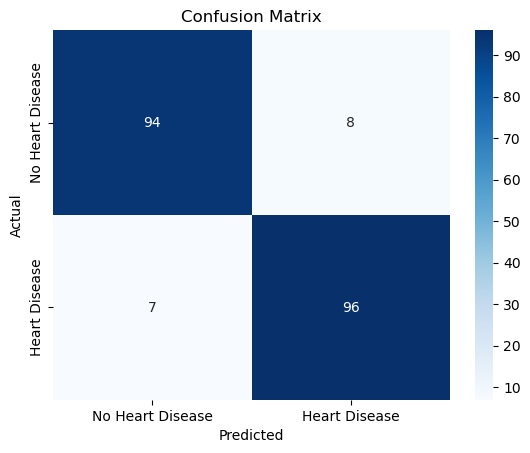

In [32]:
cm = confusion_matrix(y_val, predictions, labels=[0, 1])

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['No Heart Disease', 'Heart Disease'])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [33]:
print(recall_score(cm))

0.9320388349514563


In [34]:
print(precision_score(cm))

0.9230769230769231


In [35]:
print(f1_score(cm))

0.927536231884058


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


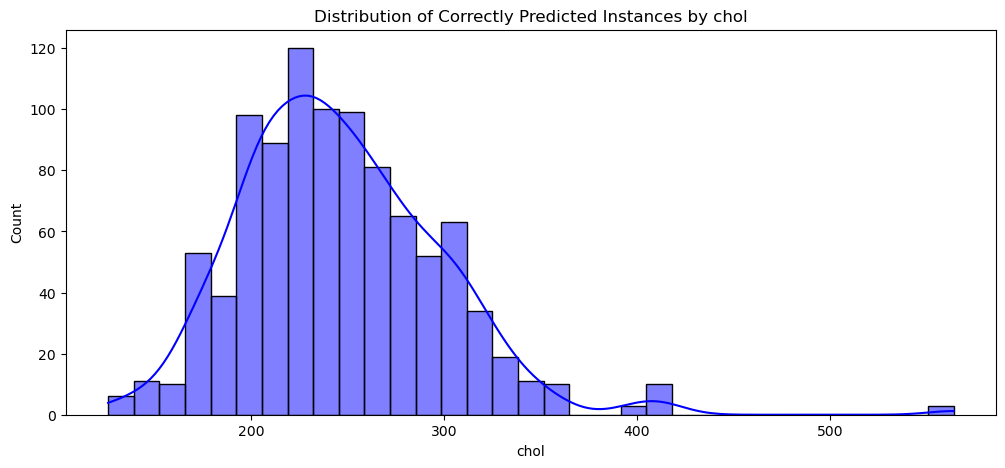

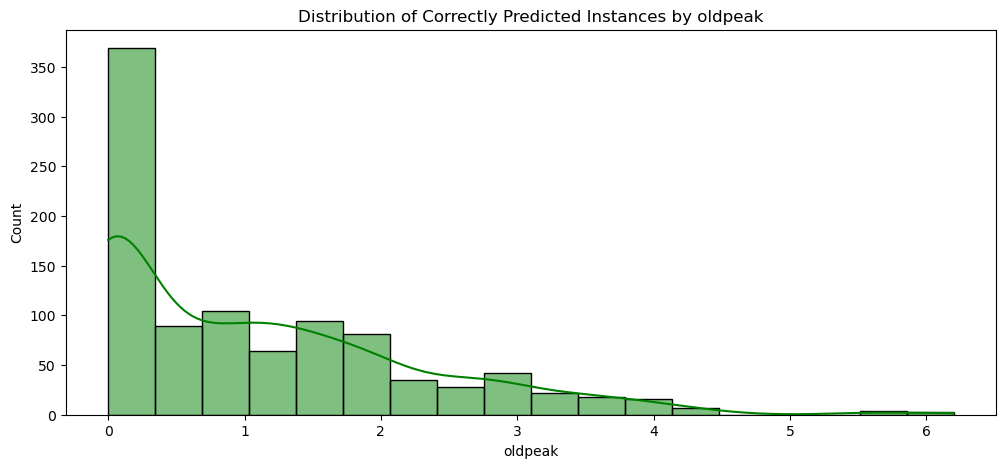

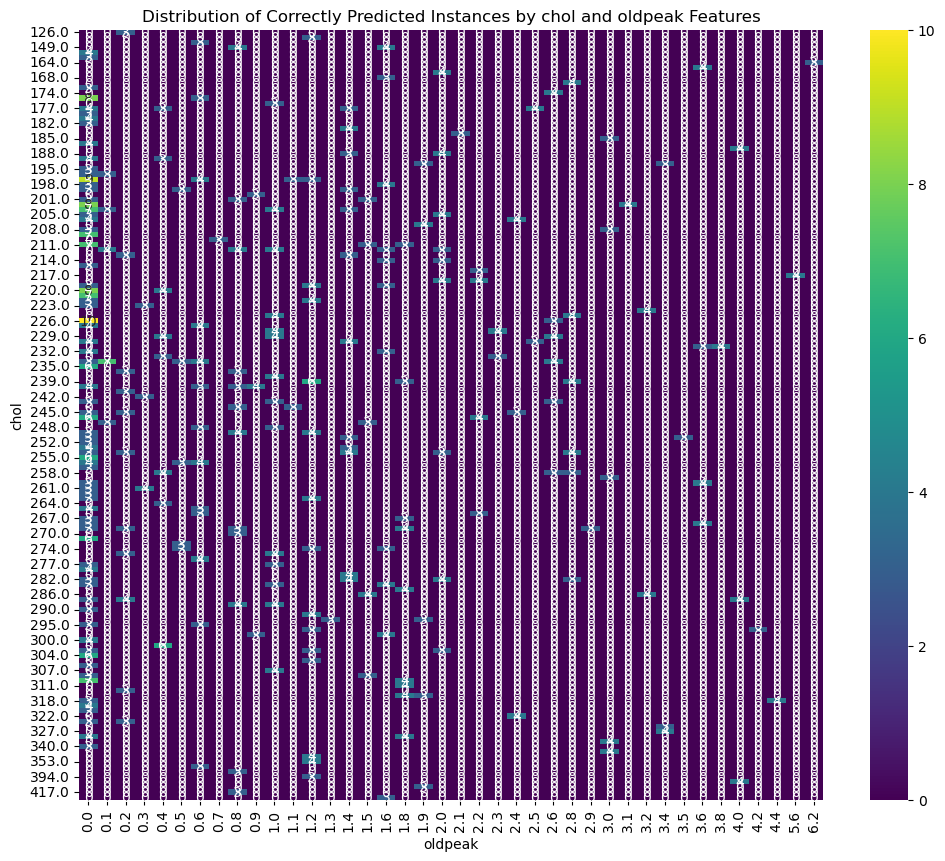

In [47]:
predictions = model.predict(X)


df = pd.DataFrame({'Predicted': predictions, 'chol': X[:, 10], 'oldpeak': X[:, 12]})

df_correct = df[df['Predicted'] == y]

plt.figure(figsize=(12, 5))
sns.histplot(df_correct['chol'], kde=True, color='blue')
plt.title('Distribution of Correctly Predicted Instances by chol')
plt.xlabel('chol')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12, 5))
sns.histplot(df_correct['oldpeak'], kde=True, color='green')
plt.title('Distribution of Correctly Predicted Instances by oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.show()

# Group by chol and oldpeak
heatmap_data = df_correct.groupby(['chol', 'oldpeak']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Distribution of Correctly Predicted Instances by chol and oldpeak Features')
plt.show()


Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [37]:
X_no_chol = np.delete(X, 10, axis=1)

X_train_no_chol, X_test_no_chol, y_train, y_test = train_test_split(X_no_chol, y, test_size=0.2, random_state=42)

# Training a logistic regression model without the "chol" feature
model_no_chol = MixedDataNaiveBayes()
model_no_chol.fit(X_train_no_chol, y_train)

# Predicting on the test set
predictions_no_chol = model_no_chol.predict(X_test_no_chol)

# Calculating accuracy
accuracy_no_chol = accuracy_score(y_test, predictions_no_chol)

print("Accuracy without chol feature:", accuracy_no_chol)


Accuracy without chol feature: 0.8731707317073171


Remove oldpeak and test model

In [38]:

X_no_oldpeak = np.delete(X, 12, axis=1)

# Splitting data into train and test sets
X_train_no_oldpeak, X_test_no_oldpeak, y_train, y_test = train_test_split(X_no_oldpeak, y, test_size=0.2, random_state=42)

# Training a logistic regression model without the "oldpeak" feature
model_no_oldpeak = MixedDataNaiveBayes()  # Assuming MixedDataNaiveBayes is your Naive Bayes model
model_no_oldpeak.fit(X_train_no_oldpeak, y_train)

# Predicting on the test set
predictions_no_oldpeak = model_no_oldpeak.predict(X_test_no_oldpeak)

# Calculating accuracy
accuracy_no_oldpeak = accuracy_score(y_test, predictions_no_oldpeak)

print("Accuracy without oldpeak feature:", accuracy_no_oldpeak)


Accuracy without oldpeak feature: 0.9170731707317074


Comparison:

As evident from the plotted distributions, the distribution with respect to **oldpeak** is closer to uniform, indicating that the effect of **chol** should be more significant. This inference can also be derived from the joint distribution plot. 
On the other hand, the model accuracy is 93%, which decreases to 87% when **chol** is removed and to 92% when **oldpeak** is removed.<font color = 'red'> **This suggests that the effect of chol is greater than oldpeak.**</font>


# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

# Comparison

In the comparison between the perceptron and the Naive Bayes model, the Naive Bayes model demonstrated superior performance, achieving an accuracy of approximately 93%, whereas the perceptron's best performance yielded an accuracy of 76%. This performance difference can be attributed to several factors:

## Factors :

1. **Data Distribution**: Naive Bayes excels when features are conditionally independent given the class. If the dataset exhibited this characteristic, Naive Bayes would naturally perform better. However, if strong dependencies existed between features, the perceptron might have been more effective.

2. **Feature Representation**: The choice of feature representation heavily influences model performance. If the features aligned well with Naive Bayes' assumption of conditional independence, it would yield better results. Conversely, if the features had complex interdependencies that the perceptron could capture, it might have outperformed Naive Bayes.

3. **Model Complexity**: Naive Bayes is inherently simpler than the perceptron, which can make it more robust to noise and less prone to overfitting, especially with smaller datasets.

4. **Hyperparameter Tuning**: The perceptron's performance might have been hindered by suboptimal hyperparameters. Effective hyperparameter tuning is crucial for maximizing model performance.

5. **Data Preprocessing**: The quality of data preprocessing significantly impacts model performance. If the data contained noise or irrelevant features, it could have adversely affected the perceptron more, given its sensitivity to feature representations.

6. **Model Assumptions**: Naive Bayes assumes feature independence given the class, which may not always hold true. Violations of this assumption could diminish Naive Bayes' performance.



# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def train_and_evaluate_model(csv_file):
    
    df = pd.read_csv(csv_file)

    # Count the number of samples for each target label
    sample_counts = df['target'].value_counts()

    # Print the counts
    for label, count in sample_counts.items():
        print(f"Number of samples with target label {label}: {count}")

    # Plot the counts
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sample_counts.index, y=sample_counts.values, palette='viridis')
    plt.title('Number of Samples per Target Label')
    plt.xlabel('Target Label')
    plt.ylabel('Number of Samples')
    plt.show()

    # Extract features and target variable
    X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].values
    y = df['target'].values

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = MixedDataNaiveBayes()
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_val)

    # Evaluate model performance
    accuracy = accuracy_score(y_val, predictions)
    cm = confusion_matrix(y_val, predictions, labels=[0, 1])
    recall = recall_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)

    # Print the results
    print("Accuracy:", accuracy)
    print("Recall Score:", recall)
    print("Precision Score:", precision)
    print("F1 Score:", f1)

    # Plot the confusion matrix
    plot_confusion_matrix(cm, labels=['No Heart Disease', 'Heart Disease'])


## First dataset

Number of samples with target label 0: 499
Number of samples with target label 1: 226


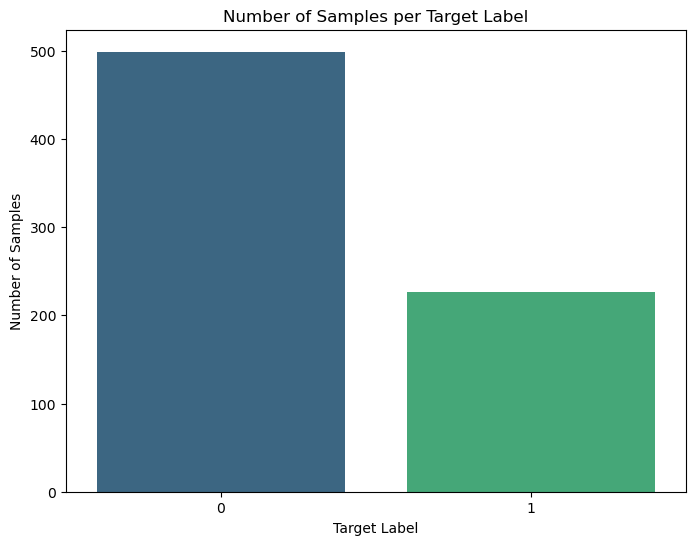

Accuracy: 0.9310344827586207
Recall Score: 0.9148936170212766
Precision Score: 0.8775510204081632
F1 Score: 0.8958333333333333


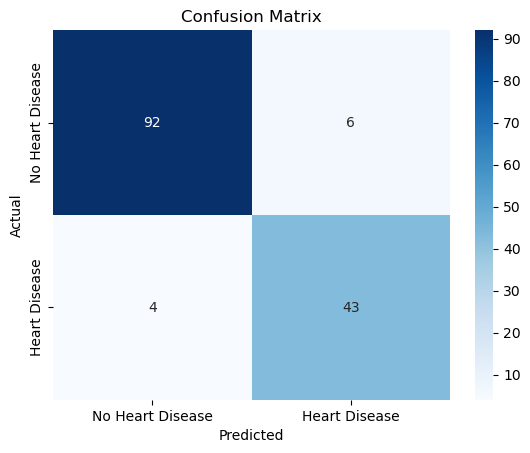

In [49]:
train_and_evaluate_model("Imbalanced_Datasets/1.csv")

## Second dataset

Number of samples with target label 0: 499
Number of samples with target label 1: 126


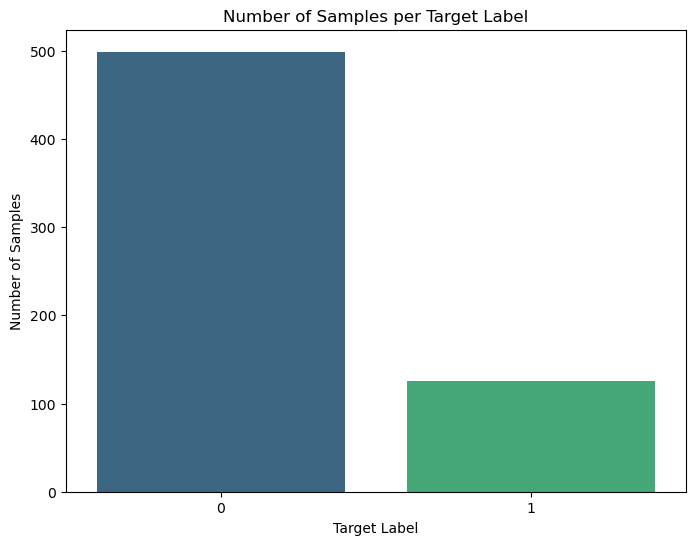

Accuracy: 0.912
Recall Score: 0.7241379310344828
Precision Score: 0.875
F1 Score: 0.7924528301886793


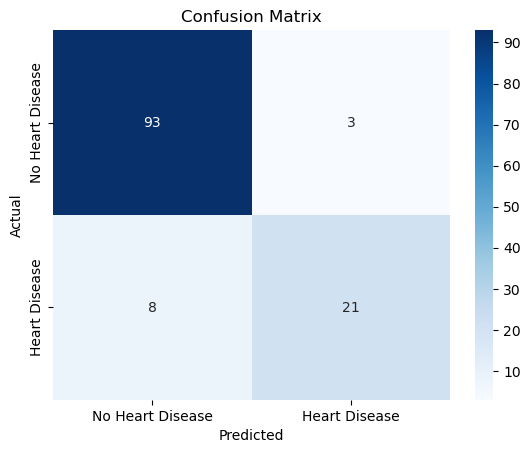

In [41]:
train_and_evaluate_model("Imbalanced_Datasets/2.csv")

## Third dataset

Number of samples with target label 0: 499
Number of samples with target label 1: 26


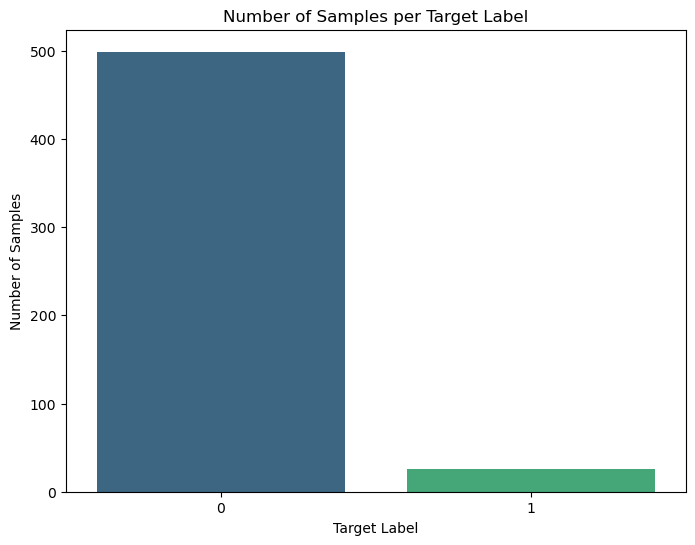

Accuracy: 0.9904761904761905
Recall Score: 0.6666666666666666
Precision Score: 1.0
F1 Score: 0.8


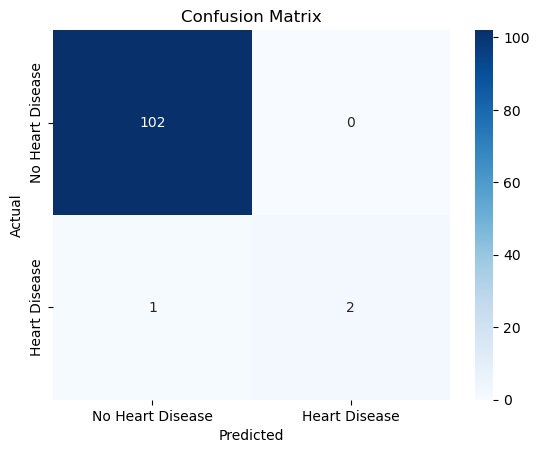

In [42]:
train_and_evaluate_model("Imbalanced_Datasets/3.csv")

## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

# Evaluating Models in Imbalanced Datasets

When your dataset is imbalanced, meaning one class has a lot more samples than the other, relying solely on accuracy to evaluate your model might not give you the full picture. That's because accuracy can be high even if your model is just predicting the majority class most of the time.

To get a better understanding of how well your model is really doing, it's important to look at metrics like F1 score, precision, and recall.

- **F1 Score:** F1 score is a balance between precision and recall. It's the harmonic mean of precision and recall, giving equal weight to both. This makes it a robust metric for evaluating models in imbalanced datasets because it considers performance on both the minority and majority classes.

- **Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model. In imbalanced datasets, precision might decrease if the model tends to make more false positive predictions for the minority class, as these false positives contribute to the denominator of the precision calculation.

- **Recall:** Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances in the dataset. In imbalanced datasets, recall might decrease if the model struggles to identify the minority class correctly, as the true positives for the minority class contribute to the numerator of the recall calculation.

So, in imbalanced datasets, F1 score, precision, and recall are often smarter choices for evaluating your model compared to accuracy alone. Balancing your training dataset to give both classes equal weight can lead to more reliable results in real-world situations.

When datasets become more balanced, precision and recall can both change. In a balanced dataset, the model has an equal opportunity to learn from both classes, which can lead to improvements in both precision and recall for the minority class. This is because the model is less likely to favor the majority class and more likely to make accurate predictions for the minority class. However, it's essential to ensure that the dataset remains representative of real-world scenarios.
